### Import the libraries that will be used

In [27]:
import os 
import tensorflow as tf

We will use the Rock-Paper-Scissors dataset which can be downloaded from the following link :https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

In [17]:
base_dir = 'rockpaperscissors/rps-cv-images'
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

## Splitting the training dataset with the validation dataset.

In [18]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.4,
  subset="training",
  image_size=(180,180),
  batch_size=32,
  seed=42)

Found 2188 files belonging to 3 classes.


Using 1313 files for training.


In [19]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.4,
  subset="validation",
  image_size=(180,180),
  batch_size=32,
  seed=42)

Found 2188 files belonging to 3 classes.
Using 875 files for validation.


### inspect the class contents

In [20]:
class_names = train_ds.class_names
class_names

['paper', 'rock', 'scissors']

In [21]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical", seed=42),
  tf.keras.layers.RandomRotation(0.1, seed=42),
])

In [22]:
NUM_CLASSES = len(class_names)
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    data_augmentation,
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                 

In [24]:
# compile the model with the 'adam' optimizer and the loss function 'SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
# train model with model.fit 
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,)

Epoch 1/20


42/42 [==============================] - 80s 2s/step - loss: 1.1330 - accuracy: 0.3427 - val_loss: 1.0979 - val_accuracy: 0.2926
Epoch 2/20
42/42 [==============================] - 71s 2s/step - loss: 0.9491 - accuracy: 0.5209 - val_loss: 0.6317 - val_accuracy: 0.6377
Epoch 3/20
42/42 [==============================] - 73s 2s/step - loss: 0.4939 - accuracy: 0.8058 - val_loss: 0.3182 - val_accuracy: 0.9086
Epoch 4/20
42/42 [==============================] - 85s 2s/step - loss: 0.3459 - accuracy: 0.8713 - val_loss: 0.2492 - val_accuracy: 0.9051
Epoch 5/20
42/42 [==============================] - 74s 2s/step - loss: 0.3349 - accuracy: 0.8728 - val_loss: 0.1933 - val_accuracy: 0.9394
Epoch 6/20
42/42 [==============================] - 76s 2s/step - loss: 0.3345 - accuracy: 0.8682 - val_loss: 0.2085 - val_accuracy: 0.9303
Epoch 7/20
42/42 [==============================] - 74s 2s/step - loss: 0.2432 - accuracy: 0.9101 - val_loss: 0.1401 - val_accuracy: 0.9509
Epoch 8/20
42/42 [=============

1/1 [==============================] - 0s 274ms/step
D:/Ezra/aaa/Latihan/Portofolio/Image Classification (1)/test_case/rock.jpg
rock


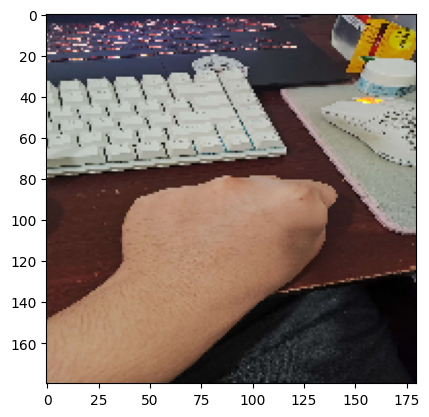

In [26]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import tkinter as tk
from tkinter import filedialog

# Initialize Tkinter
root = tk.Tk()
root.withdraw()  # Hide the main window

# Open a file dialog to select an image
file_path = filedialog.askopenfilename()


if file_path:  # Proceed if a file was selected
    img = image.load_img(file_path, target_size=(180,180))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(file_path)
    if classes[0,0] != 0:
        print('rock')  
    elif classes[0,1] != 0:
        print('paper')  
    else:
        print('scissors')  
else:
    print("No file selected")